In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Gaussian distribution (mutlivariate)

$\\f_{\textbf{x}}(x_{1},....,x_{k})=\frac{exp(-\frac{1}{2}(x-\mu)^{T}P^{-1}(x-\mu))}{\sqrt{(2\pi)^{k}|P|}}$

### Scalar case
$\\f_{\textbf{x}}(x)=\frac{exp(\frac{-\frac{1}{2}(x-\mu)^{2}}{\sigma})}{\sqrt{(2\pi)}\sigma}$


In [12]:
mu=180
sigma=10
num_samples=1000
x=mu+sigma*np.random.randn(num_samples)

In [13]:
x.shape

(1000,)

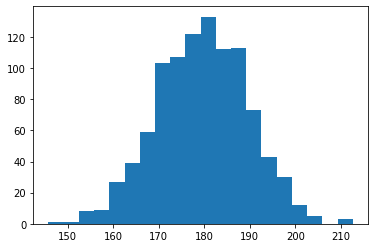

In [14]:
plt.hist(x,20);


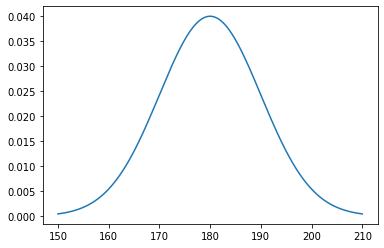

In [15]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, num_samples)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

## Important features

Having to random variable x and y, the following properites are true: 
* $E(ax+by) = E(ax) + E(by)$
* $E(ax +b) = a E(x) +b $
* $var(ax+b)= a^2 var(x) $  #scalar case
* $cov(AX) = A*cov(X)*A^{T} $  #vector case
* $cov(AX+BY)= A*cov(X)*A^{T}+B*cov(Y)*B^{T}$  #X and Y are not corelated 


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
dt=1
T=50
x_true=np.zeros([T])

x_true[0]=0
x_odom=np.zeros_like(x_true)
x_odom[0]=0
sigma=0.4;
v=0.8;

for i in range(T-1):
    x_true[i+1]=x_true[i]+ v*dt + dt*sigma*np.random.randn()
    x_odom[i+1]=x_odom[i]+v*dt
    

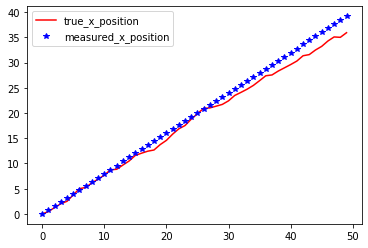

In [20]:
plt.plot(x_true,'r',label='true_x_position')
plt.plot(x_odom,'*b',label='measured_x_position')

plt.legend()



In [21]:
# noisy measurements
z=np.zeros_like(x_odom)
r=2
for i in range(T):
    z[i]=x_true[i]+r*np.random.randn()



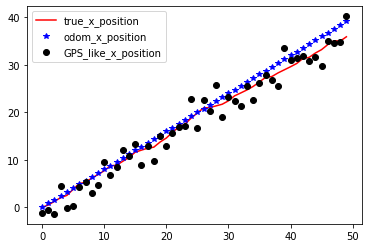

In [22]:
plt.plot(x_true,'r',label='true_x_position')
plt.plot(x_odom,'*b',label='odom_x_position')
plt.plot(z,'ok',label='GPS_like_x_position')

plt.legend()

# Motion Model
$x_{i+1}=Ax_{i}+Bu_{i}+G\omega_{i}(t); ~ \omega_{i}(t)\sim N(0;q) \\ 
x_{i+1}=x_{i}+dt*V_{i}+dt*\omega_{i}(t); ~ \omega_{i}(t)\sim N(0;\sigma^{2})$


## From the previous model, what is the value of:
* A=1
* B=dt
* G=dt
* q=$\sigma^{2}$

# Measurement Model
$z_{i}=Hx_{i}+v_{i};~ v_{i}\sim N(0;R) \\
z_{i}=x_{i}+v_{i};~ v_{i}\sim N(0;r^{2})$

## From the previous model, what is the value of:
* H=1
* R=$r^2$

# Kalman filter pipeline (two steps)

#### Initial conditions (priori): Kalman filter consider latents variables (variables to be estimated) randum variables woth gaussian distributions (two parameters are required to describe them). 
$\hat{x}_{0}=? \\
P_{0}=?$

#### Step 1: Prediction (using only motion model)
$x_{i+1|i}=A*\hat{x}_{i}+B*u_{i} \\
\\
P_{i+1|i}=A*P_{i}*A'+G*q*G'$ 

### Step 2: Update (fusing (combining) the results of the measurements with the ouput of the motion model)
$K=\frac{P_{i+1|i}H'}{HP_{i+1|i}H'+R} \\
\\
\hat{x}_{i+1}=x_{i+1|i}+K(z_{i+1}-Hx_{i+1|i})\\
\\
P_{i+1}=(1-KH)P_{i+1|i}$

In [23]:
# Implement KF
A=np.array([1])
B=dt
G=np.array([dt])
u=v #v=0.8
q=sigma**2
H=np.array([1])
R=r**2



# Prior information
m=0
p=9

estimated_x=[m]
estimated_P=[p]

# The Pipeline

for i in range(T):
    
    m=A*m+B*u
    p=A*p*A.transpose()+G*q*G.transpose()
    
    K=p*H.transpose()/(H*p*H.transpose()+R)
    m=m+K*(z[i]-H*m)
    p=(1-K*H)*p
    
    estimated_x.append(m)
    estimated_P.append(p)
    
    
    



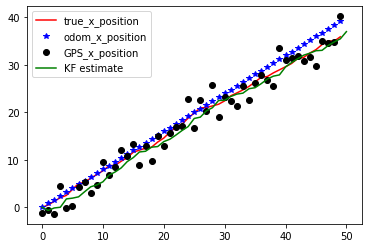

In [24]:
# visualization
estimated_x=np.array(estimated_x)
estimated_P=np.array(estimated_P)

plt.plot(x_true,'r',label='true_x_position')
plt.plot(x_odom,'*b',label='odom_x_position')
plt.plot(z,'ok',label='GPS_x_position')
plt.plot(estimated_x,'g',label='KF estimate')

plt.legend()


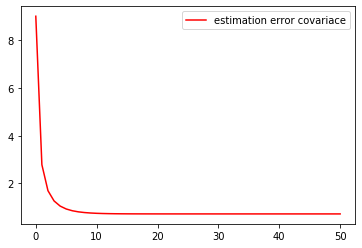

In [25]:
plt.plot(estimated_P,'r',label='estimation error covariace')
plt.legend()

## 2D example ( x, y coordinates --> then velocity )